In [0]:
# R. O. Gomes, last update 23.04.2020

import tensorflow as tf
print(tf.__version__)

import matplotlib.pyplot as plt


2.2.0-rc3


In [0]:
# Load MSNIST data
fashion_mnist= tf.keras.datasets.fashion_mnist

labels={
0: 'T-shirt/top', 
1: 'Trouser',
2: 'Pullover',
3: 'Dress',
4: 'Coat',
5: 'Sandal',
6: 'Shirt',
7: 'Sneaker',
8: 'Bag',
9: 'Ankle boot',
}


(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train, x_test = x_train/255.0, x_test/255.0

print(x_train.shape)

(60000, 28, 28)


In [0]:
# Model

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation='softmax')
                                    ])


In [0]:
# Compile the model

model.compile(optimizer='adam',
              loss= 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
# Training

fitting = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=11)

Epoch 1/11
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5231 - accuracy: 0.8138 - val_loss: 0.4345 - val_accuracy: 0.8421
Epoch 2/11
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3999 - accuracy: 0.8548 - val_loss: 0.3948 - val_accuracy: 0.8569
Epoch 3/11
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3647 - accuracy: 0.8673 - val_loss: 0.3768 - val_accuracy: 0.8642
Epoch 4/11
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3455 - accuracy: 0.8741 - val_loss: 0.3611 - val_accuracy: 0.8692
Epoch 5/11
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3307 - accuracy: 0.8787 - val_loss: 0.3560 - val_accuracy: 0.8735
Epoch 6/11
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3164 - accuracy: 0.8824 - val_loss: 0.3491 - val_accuracy: 0.8755
Epoch 7/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3078 - accuracy: 0.8857 - val_loss: 0.3461 - val_accuracy:

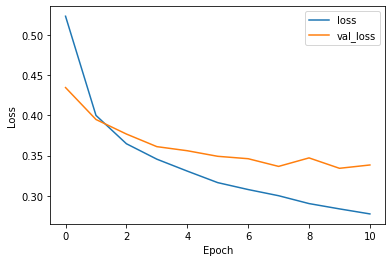

In [0]:
# Loss per iteratction (history is an attribute from the model which stores ['loss', 'accuracy', 'val_loss', 'val_accuracy'] in a dictionary)
plt.plot(fitting.history['loss'], label='loss')
plt.plot(fitting.history['val_loss'], label='val_loss')

plt.xlabel('Epoch')
plt.ylabel('Loss')


plt.legend()

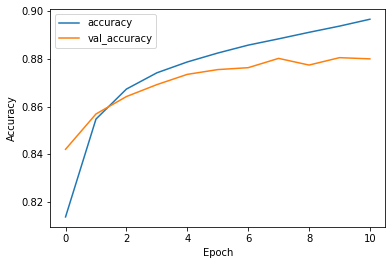

In [0]:
# Accuracy per iteratction (history is an attribute from the model which stores ['loss', 'accuracy', 'val_loss', 'val_accuracy'] in a dictionary)
plt.plot(fitting.history['accuracy'], label='accuracy')
plt.plot(fitting.history['val_accuracy'], label='val_accuracy')

plt.xlabel('Epoch')
plt.ylabel('Accuracy')

plt.legend()

In [0]:
# Evaluate

print(model.evaluate(x_test,y_test))



313/313 [==============================] - 0s 1ms/step - loss: 0.3383 - accuracy: 0.8800
[0.33831560611724854, 0.8799999952316284]


In [0]:
# Plotting Confusion Matrix

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

Confusion matrix (no normalization)
[[865   1  13  39   5   0  70   0   7   0]
 [  1 975   0  18   3   0   1   0   2   0]
 [ 16   1 805  15 111   0  50   0   2   0]
 [ 17   8   9 927  16   0  15   0   8   0]
 [  0   1  84  54 819   0  38   0   4   0]
 [  0   0   0   1   0 938   0  31   1  29]
 [158   2 110  32  99   0 587   0  12   0]
 [  0   0   0   0   0   8   0 928   0  64]
 [  6   0   5   5   3   1   2   4 974   0]
 [  1   0   0   0   0   2   0  15   0 982]]


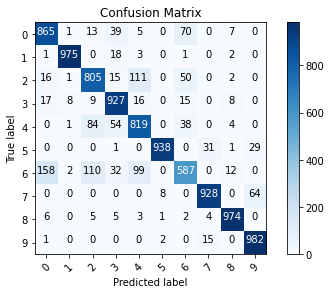

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize = False, 
                          title='Confusion Matrix',
                          cmap = plt.cm.Blues):
  'To normalize the confusion matrix, set normalize to True'

  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print('Normalized confusion matrix')
  else : 
    print('Confusion matrix (no normalization)')
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks= np.arange(len(classes))
  plt.xticks(tick_marks,  classes, rotation=45)
  plt.yticks(tick_marks,  classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j],fmt),
             horizontalalignment='center',
             color='white' if cm[i,j]>thresh else 'black')
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm =  confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

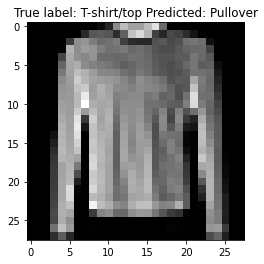

In [0]:
# Looking for misclassified data

misclassified_idx = np.where(p_test !=y_test)[0]
i = np.random.choice(misclassified_idx)

plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));